# Statistical Modeling Woche 8

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Students Social Media Addiction.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


                    Anzahl  Prozent
Most_Used_Platform                 
Instagram              249     35.3
TikTok                 154     21.8
Facebook               123     17.4
WhatsApp                54      7.7
Twitter                 30      4.3
LinkedIn                21      3.0
WeChat                  15      2.1
Snapchat                13      1.8
LINE                    12      1.7
KakaoTalk               12      1.7
VKontakte               12      1.7
YouTube                 10      1.4


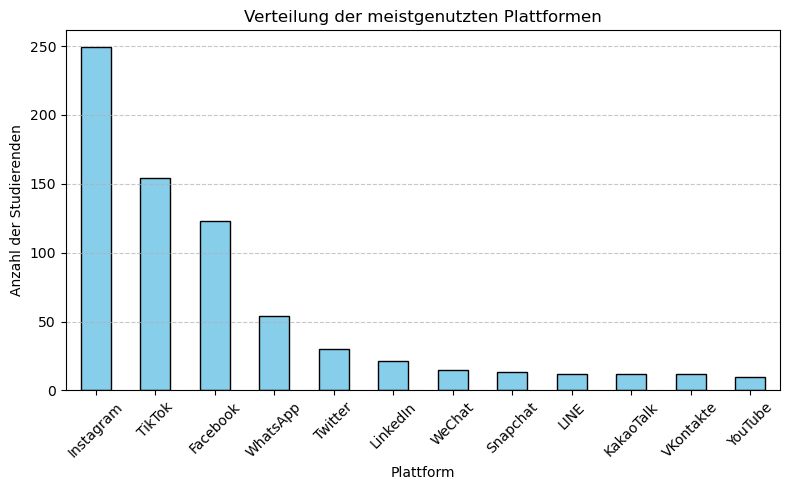

In [22]:
# Plattform-Verteilung berechnen
platform_counts = df['Most_Used_Platform'].value_counts().sort_values(ascending=False)
platform_percent = round((platform_counts / platform_counts.sum()) * 100, 1)

# Zusammenfassen in eine DataFrame
platform_summary = pd.DataFrame({
    'Anzahl': platform_counts,
    'Prozent': platform_percent
})

# Tabelle anzeigen
print(platform_summary)

# Balkendiagramm zeichnen
plt.figure(figsize=(8, 5))
platform_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Verteilung der meistgenutzten Plattformen")
plt.xlabel("Plattform")
plt.ylabel("Anzahl der Studierenden")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# Kreuztabelle erstellen
plattform_land = pd.crosstab(df['Most_Used_Platform'], df['Country'])

# Optional: nach häufigster Plattform sortieren
plattform_land = plattform_land.loc[plattform_land.sum(axis=1).sort_values(ascending=False).index]

# Ausgabe
print(plattform_land)

Country             Afghanistan  Albania  Andorra  Argentina  Armenia  \
Most_Used_Platform                                                      
Instagram                     0        0        0          0        1   
TikTok                        0        1        1          1        0   
Facebook                      0        0        0          0        0   
WhatsApp                      0        0        0          0        0   
Twitter                       0        0        0          0        0   
LinkedIn                      1        0        0          0        0   
WeChat                        0        0        0          0        0   
Snapchat                      0        0        0          0        0   
KakaoTalk                     0        0        0          0        0   
LINE                          0        0        0          0        0   
VKontakte                     0        0        0          0        0   
YouTube                       0        0        0  

In [26]:
# Prozentuale Plattformverteilung innerhalb jedes Landes
plattform_land_percent = pd.crosstab(df['Most_Used_Platform'], df['Country'], normalize='columns') * 100
plattform_land_percent = round(plattform_land_percent, 1)

print(plattform_land_percent)

Country             Afghanistan  Albania  Andorra  Argentina  Armenia  \
Most_Used_Platform                                                      
Facebook                    0.0      0.0      0.0        0.0      0.0   
Instagram                   0.0      0.0      0.0        0.0    100.0   
KakaoTalk                   0.0      0.0      0.0        0.0      0.0   
LINE                        0.0      0.0      0.0        0.0      0.0   
LinkedIn                  100.0      0.0      0.0        0.0      0.0   
Snapchat                    0.0      0.0      0.0        0.0      0.0   
TikTok                      0.0    100.0    100.0      100.0      0.0   
Twitter                     0.0      0.0      0.0        0.0      0.0   
VKontakte                   0.0      0.0      0.0        0.0      0.0   
WeChat                      0.0      0.0      0.0        0.0      0.0   
WhatsApp                    0.0      0.0      0.0        0.0      0.0   
YouTube                     0.0      0.0      0.0  

In [28]:
# Plattformverteilung für Studierende aus Deutschland
plattform_deutschland = df[df['Country'] == 'Germany']['Most_Used_Platform'].value_counts().sort_values(ascending=False)

# Prozentuale Verteilung
plattform_de_percent = round((plattform_deutschland / plattform_deutschland.sum()) * 100, 1)

# Tabelle
plattform_de_summary = pd.DataFrame({
    'Anzahl': plattform_deutschland,
    'Prozent': plattform_de_percent
})

print(plattform_de_summary)

                    Anzahl  Prozent
Most_Used_Platform                 
Facebook                 7     50.0
Instagram                6     42.9
LinkedIn                 1      7.1


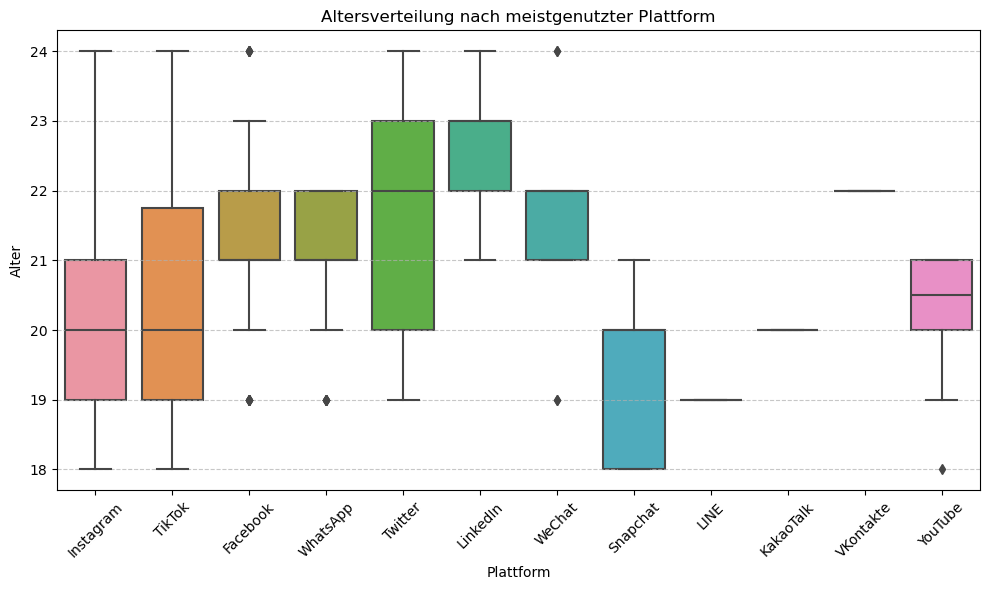

In [30]:
import seaborn as sns

# Boxplot zeichnen
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Most_Used_Platform', y='Age', order=df['Most_Used_Platform'].value_counts().index)

plt.title("Altersverteilung nach meistgenutzter Plattform")
plt.xlabel("Plattform")
plt.ylabel("Alter")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


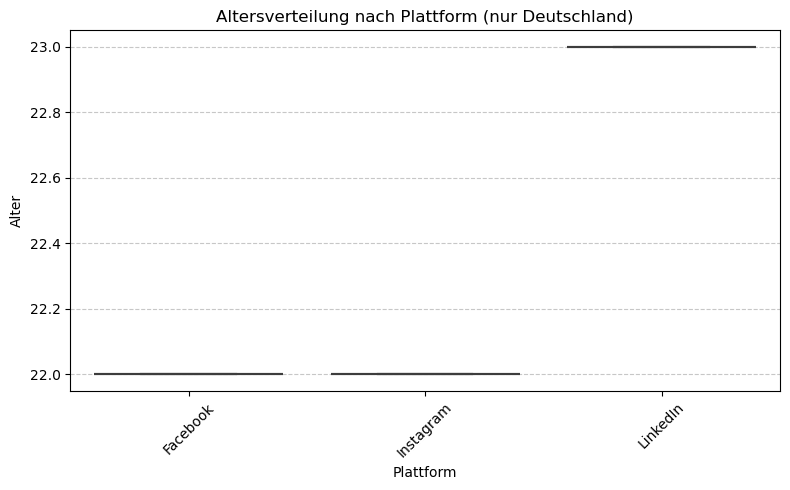

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datensatz auf Deutschland filtern
df_de = df[df['Country'] == 'Germany']

# Boxplot für Altersverteilung je Plattform
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_de, x='Most_Used_Platform', y='Age', order=df_de['Most_Used_Platform'].value_counts().index)

plt.title("Altersverteilung nach Plattform (nur Deutschland)")
plt.xlabel("Plattform")
plt.ylabel("Alter")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
# Anzahl der Einträge mit Country == "Germany"
anzahl_de = df[df['Country'] == 'Germany'].shape[0]
print(f"Anzahl der Teilnehmer:innen aus Deutschland: {anzahl_de}")

Anzahl der Teilnehmer:innen aus Deutschland: 14


In [34]:
gesamt = df.shape[0]
anzahl_de = df[df['Country'] == 'Germany'].shape[0]
anteil_prozent = round(anzahl_de / gesamt * 100, 1)

print(f"Teilnehmer:innen aus Deutschland: {anzahl_de} ({anteil_prozent} % von {gesamt})")

Teilnehmer:innen aus Deutschland: 14 (2.0 % von 705)


In [35]:
# Deutschland filtern
df_de = df[df['Country'] == 'Germany']

# Altersstatistiken berechnen
alter_mittelwert = df_de['Age'].mean()
alter_median = df_de['Age'].median()
alter_std = df_de['Age'].std()
alter_min = df_de['Age'].min()
alter_max = df_de['Age'].max()

print(f"Anzahl: {df_de.shape[0]}")
print(f"Alter (Mittelwert): {alter_mittelwert:.1f}")
print(f"Alter (Median): {alter_median}")
print(f"Alter (Standardabweichung): {alter_std:.1f}")
print(f"Alter (Min–Max): {alter_min}–{alter_max}")


Anzahl: 14
Alter (Mittelwert): 22.1
Alter (Median): 22.0
Alter (Standardabweichung): 0.3
Alter (Min–Max): 22–23


In [57]:
df1 = pd.get_dummies(df, drop_first=False)

In [58]:
df1.head()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Female,Gender_Male,Academic_Level_Graduate,...,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Affects_Academic_Performance_No,Affects_Academic_Performance_Yes,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single
0,1,19,5.2,6.5,6,3,8,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,2,22,2.1,7.5,8,0,3,False,True,True,...,True,False,False,False,False,True,False,False,False,True
2,3,20,6.0,5.0,5,4,9,True,False,False,...,False,False,False,False,False,False,True,True,False,False
3,4,18,3.0,7.0,7,1,4,False,True,False,...,False,False,False,False,True,True,False,False,False,True
4,5,21,4.5,6.0,6,2,7,False,True,True,...,False,False,False,False,False,False,True,False,True,False


In [59]:
df1.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [60]:
df1.columns

Index(['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Gender_Female', 'Gender_Male', 'Academic_Level_Graduate',
       ...
       'Most_Used_Platform_Twitter', 'Most_Used_Platform_VKontakte',
       'Most_Used_Platform_WeChat', 'Most_Used_Platform_WhatsApp',
       'Most_Used_Platform_YouTube', 'Affects_Academic_Performance_No',
       'Affects_Academic_Performance_Yes', 'Relationship_Status_Complicated',
       'Relationship_Status_In Relationship', 'Relationship_Status_Single'],
      dtype='object', length=139)

In [61]:
for col in df1.columns:
    print(col)

Student_ID
Age
Avg_Daily_Usage_Hours
Sleep_Hours_Per_Night
Mental_Health_Score
Conflicts_Over_Social_Media
Addicted_Score
Gender_Female
Gender_Male
Academic_Level_Graduate
Academic_Level_High School
Academic_Level_Undergraduate
Country_Afghanistan
Country_Albania
Country_Andorra
Country_Argentina
Country_Armenia
Country_Australia
Country_Austria
Country_Azerbaijan
Country_Bahamas
Country_Bahrain
Country_Bangladesh
Country_Belarus
Country_Belgium
Country_Bhutan
Country_Bolivia
Country_Bosnia
Country_Brazil
Country_Bulgaria
Country_Canada
Country_Chile
Country_China
Country_Colombia
Country_Costa Rica
Country_Croatia
Country_Cyprus
Country_Czech Republic
Country_Denmark
Country_Ecuador
Country_Egypt
Country_Estonia
Country_Finland
Country_France
Country_Georgia
Country_Germany
Country_Ghana
Country_Greece
Country_Hong Kong
Country_Hungary
Country_Iceland
Country_India
Country_Indonesia
Country_Iraq
Country_Ireland
Country_Israel
Country_Italy
Country_Jamaica
Country_Japan
Country_Jordan


In [62]:
model = smf.ols("Addicted_Score ~ Age + Avg_Daily_Usage_Hours + Sleep_Hours_Per_Night + Mental_Health_Score + Conflicts_Over_Social_Media", data=df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2380.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        08:52:23   Log-Likelihood:                -306.26
No. Observations:                 705   AIC:                             624.5
Df Residuals:                     699   BIC:                             651.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [63]:
model1 = smf.ols("Addicted_Score ~ Avg_Daily_Usage_Hours", data=df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1581.
Date:                Mon, 12 May 2025   Prob (F-statistic):          4.70e-182
Time:                        08:52:23   Log-Likelihood:                -910.15
No. Observations:                 705   AIC:                             1824.
Df Residuals:                     703   BIC:                             1833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.27

In [64]:
model2 = smf.ols("Addicted_Score ~ Avg_Daily_Usage_Hours + Most_Used_Platform_TikTok", data=df1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     930.3
Date:                Mon, 12 May 2025   Prob (F-statistic):          4.14e-198
Time:                        08:52:23   Log-Likelihood:                -869.09
No. Observations:                 705   AIC:                             1744.
Df Residuals:                     702   BIC:                             1758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [65]:
model3 = smf.ols("Addicted_Score ~ Avg_Daily_Usage_Hours * Most_Used_Platform_TikTok", data=df1).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     646.2
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.75e-201
Time:                        08:52:24   Log-Likelihood:                -858.17
No. Observations:                 705   AIC:                             1724.
Df Residuals:                     701   BIC:                             1743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [66]:
model_youtube = smf.ols(
    "Addicted_Score ~ Avg_Daily_Usage_Hours * Most_Used_Platform_YouTube",
    data=df1
).fit()

print(model_youtube.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     533.4
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.04e-180
Time:                        08:52:24   Log-Likelihood:                -906.52
No. Observations:                 705   AIC:                             1821.
Df Residuals:                     701   BIC:                             1839.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [67]:
model_instagram = smf.ols(
    "Addicted_Score ~ Avg_Daily_Usage_Hours * Most_Used_Platform_Instagram",
    data=df1
).fit()

print(model_instagram.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     540.7
Date:                Mon, 12 May 2025   Prob (F-statistic):          7.16e-182
Time:                        08:52:24   Log-Likelihood:                -903.16
No. Observations:                 705   AIC:                             1814.
Df Residuals:                     701   BIC:                             1833.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [68]:
model_facebook = smf.ols(
    "Addicted_Score ~ Avg_Daily_Usage_Hours * Most_Used_Platform_Facebook",
    data=df1
).fit()

print(model_facebook.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     552.2
Date:                Mon, 12 May 2025   Prob (F-statistic):          4.15e-184
Time:                        08:52:24   Log-Likelihood:                -897.97
No. Observations:                 705   AIC:                             1804.
Df Residuals:                     701   BIC:                             1822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

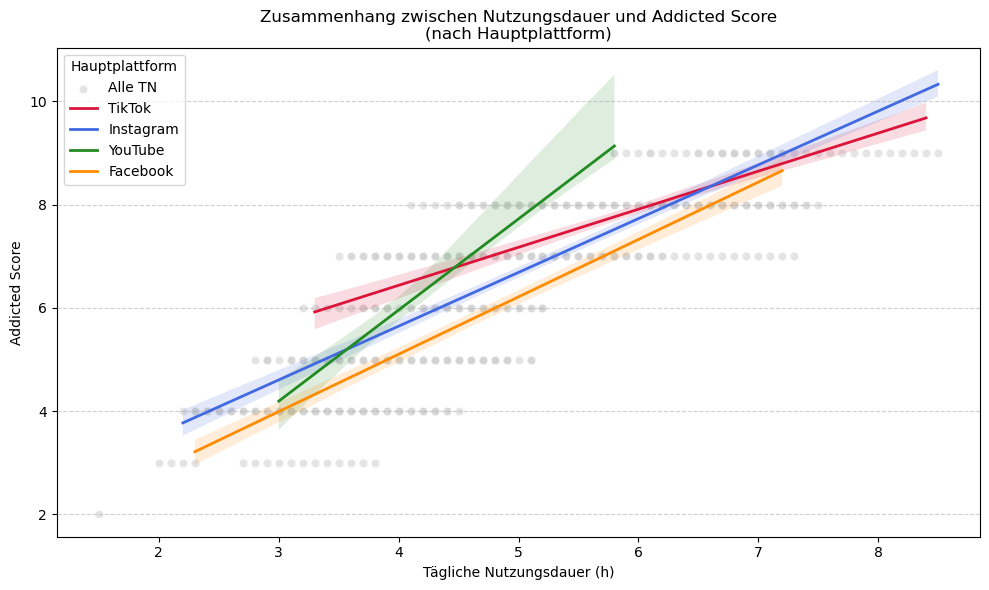

In [71]:
# Basisplot: alle Datenpunkte als Hintergrund
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score',
                color='lightgray', edgecolor='white', label='Alle TN', alpha=0.6)

# Liste der Plattformen und zugehörigen Farben
plattformen = ['TikTok', 'Instagram', 'YouTube', 'Facebook']
farben = ['crimson', 'royalblue', 'forestgreen', 'darkorange']

# Regressionslinien für jede Plattform
for plattform, farbe in zip(plattformen, farben):
    df_subset = df[df['Most_Used_Platform'] == plattform]
    if df_subset.shape[0] > 1:
        sns.regplot(data=df_subset,
                    x='Avg_Daily_Usage_Hours',
                    y='Addicted_Score',
                    scatter=False,
                    label=plattform,
                    color=farbe,
                    line_kws={'linewidth': 2})

# Layout
plt.title("Zusammenhang zwischen Nutzungsdauer und Addicted Score\n(nach Hauptplattform)")
plt.xlabel("Tägliche Nutzungsdauer (h)")
plt.ylabel("Addicted Score")
plt.legend(title="Hauptplattform")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
